In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

import re
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("Project1-Classification.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'Project1-Classification.csv'

### Question1

In [ ]:
df.shape

In [ ]:
df["full_text_num"] = df.full_text.apply(lambda x: len(re.findall('[a-zA-Z0-9]', x)))
df["full_text_num"]

In [ ]:
full_text = df["full_text_num"]

In [ ]:
# a = len(re.findall('[a-zA-Z0-9]', full_text[0]))
# a

In [ ]:
root_his = df.groupby(['root_label'])['full_text_num'].sum()

In [ ]:
leaf_his = df.groupby(['leaf_label'])['full_text_num'].sum()

In [ ]:
plt.hist(full_text, bins=100)
plt.title("Total number of alpha-numeric characters of full text")
plt.ylabel('Frequency')
plt.xlabel('Full text')

Text(0.5, 0, 'leaf label')

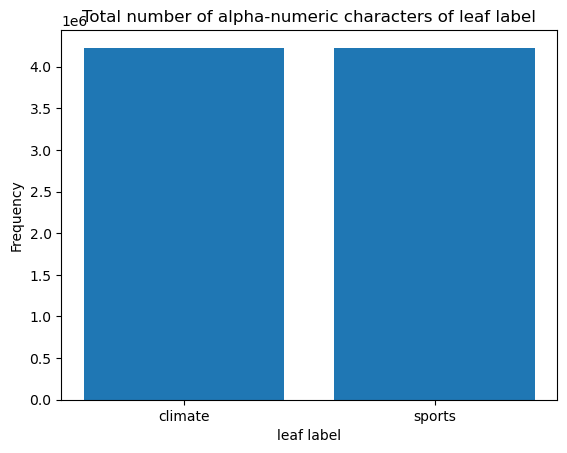

In [168]:
plt.bar(root_his.index, root_his)
plt.title("Total number of alpha-numeric characters of leaf label")
plt.ylabel('Frequency')
plt.xlabel('leaf label')

Text(0.5, 0, 'Root label')

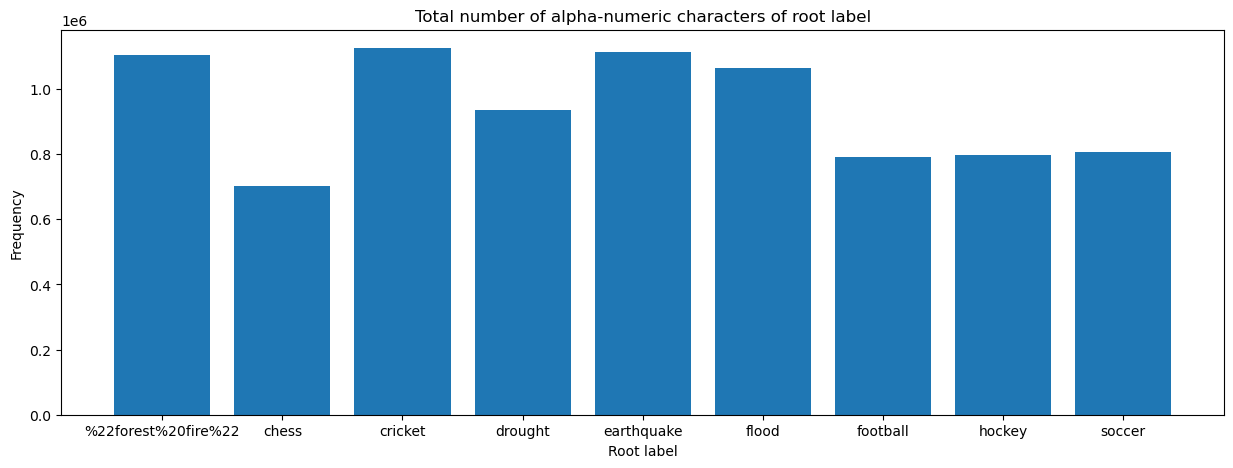

In [169]:
plt.figure(figsize=(15, 5))
plt.bar(leaf_his.index, leaf_his)
plt.title("Total number of alpha-numeric characters of root label")
plt.ylabel('Frequency')
plt.xlabel('Root label')

In [170]:
np.random.seed(42)
random.seed(42)

In [297]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)
train1, test1 = train_test_split(df[["full_text","leaf_label"]], test_size=0.2)

### Question 2

In [172]:
ntrain, ntest = len(train), len(test)
print("Number of training samples is", ntrain, ", and the number of testing samples is", ntest)

Number of training samples is 2520 , and the number of testing samples is 630


In [173]:
train.shape

(2520, 2)

In [174]:
test.shape

(630, 2)

### Question 3

#### Feature Extraction

In [175]:
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [176]:
full_text_clean = df.full_text.apply(lambda x: clean(x))
full_text_clean

0       'Pure Hockey, the largest hockey retailer in t...
1       'HKO Hockey Canada Sponsorship 20221006 Hockey...
2       'Canadian Prime Minister Justin Trudeau said W...
3       'Hockey Canada paid a crisis communications fi...
4       'The Denver Broncos are looking for a new head...
                              ...                        
3145    'By Rachel Premack of FreightWaves You probabl...
3146    'Manufacturing had a big summer. The CHIPS and...
3147    'A golf cart on a path at Verrado, an 8,800-ac...
3148    'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...
3149    'By Nora Buli OSLO (Reuters)  Norways depleted...
Name: full_text, Length: 3150, dtype: object

In [177]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
lemmatizer = WordNetLemmatizer()

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(full_text_clean)
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zy8rry6vci', 'zyada', 'zyclmwybus'],
      dtype=object)

In [178]:
# words = [lemmatizer.lemmatize(s) for s in full_text_clean]
# words

In [260]:
# Lemmatization
from nltk import pos_tag,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer

wnl = WordNetLemmatizer()
ps = PorterStemmer()

stop_words = ENGLISH_STOP_WORDS

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def stemming_sent(list_word):
    return [ps.stem(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

# remove nums as well as stop words
def stem_rmv_nums(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in stop_words and not word.isdigit())

def stemming(doc):
    return (word for word in stemming_sent(analyzer(doc)) if word not in stop_words and not word.isdigit())

analyzer = CountVectorizer().build_analyzer()
# vectorizer = CountVectorizer(min_df=3, analyzer=stem_rmv_nums) # we have removed stopwords when removing nums

# print(vectorizer)
# print('-' * 20)
# X_train = vectorizer.fit_transform(train.full_text)
# print(X_train.shape)
# print('-' * 20)
# print(len(vectorizer.get_feature_names()))
# print('-' * 20)
# print(vectorizer.get_feature_names()[:100])

In [180]:
# remove punctutations, lemmatizing, remove stopwords & numbers

In [181]:
#CountVectorizer returns a callable that handles preprocessing and tokenization
#Use the “english” stopwords of the CountVectorizer
vectorizer=CountVectorizer(analyzer=stem_rmv_nums,min_df=3,stop_words='english')

#do feature extraction (train):
X_train_counts=vectorizer.fit_transform(train.full_text) #get matrix of doc-term counts (training data)
print('Size of training data after lemmatization but before TF-IDF: ', X_train_counts.shape) #4732 docs, 16292 terms (originally 4732 docs, 79218 terms)
X_test_counts=vectorizer.transform(test.full_text) 
print('Size of testing data after lemmatization but before TF-IDF:  ', X_test_counts.shape) #3150 docs, 16292 terms (originally 3150 docs, 79218 terms)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print('Shape of train TF-IDF matrix: ',X_train_tfidf.shape)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print('Shape of test TF-IDF matrix:  ',X_test_tfidf.shape)

Size of training data after lemmatization but before TF-IDF:  (2520, 13589)
Size of testing data after lemmatization but before TF-IDF:   (630, 13589)
Shape of train TF-IDF matrix:  (2520, 13589)
Shape of test TF-IDF matrix:   (630, 13589)


### Question 4

In [182]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

evr_train = []
# evr_test = []
# Latent Semantic Indexing
for n in [2000]:
    
    lsi = TruncatedSVD(n_components = n, random_state=42)
    X_train_LSI = lsi.fit_transform(X_train_tfidf)
    evr_train.append(lsi.explained_variance_ratio_)
    

# lsi = TruncatedSVD(n_components = 50, random_state=42)

# X_train_LSI = lsi.fit_transform(X_train_tfidf)
# X_test_LSI = lsi.transform(X_test_tfidf)

# USigmaVt = lsi.inverse_transform(X_train_LSI)
# LSI_frobenius = np.sum(np.array(X_train_tfidf - USigmaVt)**2)
# print("Squared Frobenius Norm for LSI: " + str(LSI_frobenius))
evr_train

[array([6.17952755e-03, 2.61602726e-02, 2.23216106e-02, ...,
        1.25310627e-06, 1.08350605e-06, 1.00961292e-06])]

In [183]:
len(evr_train[0])

2000

In [184]:
evr_train_plot = []
for k in [1, 10, 50, 100, 200, 500, 1000, 2000]:
    evr_train_plot.append(evr_train[0][k-1])

Text(0, 0.5, 'Explained variance ratio')

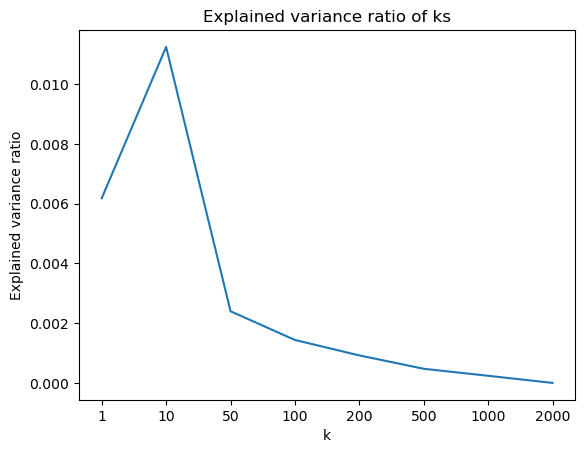

In [185]:
plt.plot(evr_train_plot)
plt.title('Explained variance ratio of ks')
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=["1", "10", "50", "100", "200", "500", "1000", "2000"])
plt.xlabel("k")
plt.ylabel('Explained variance ratio')

In [186]:
lsi = TruncatedSVD(n_components = 50, random_state=42)

X_train_LSI = lsi.fit_transform(X_train_tfidf)
X_test_LSI = lsi.transform(X_test_tfidf)

USigmaVt = lsi.inverse_transform(X_train_LSI)
LSI_frobenius = np.sum(np.array(X_train_tfidf - USigmaVt)**2)
print("Squared Fobenius Norm rfor LSI: " + str(LSI_frobenius))

Squared Fobenius Norm rfor LSI: 1669.0709587520041


In [187]:
# Non-negativee Matrix Factorization
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, random_state=42)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)

WH = np.dot(X_train_NMF, nmf.components_)
NMF_frobenius = np.sum(np.array(X_train_tfidf - WH)**2)
print("Squared Frobenius Norm for NMF: " + str(NMF_frobenius))

Squared Frobenius Norm for NMF: 1694.076942724188


In [188]:
X_test_LSI

array([[ 1.53113365e-01, -3.22763406e-02, -5.93614855e-02, ...,
         5.52335315e-03, -1.08966169e-03, -5.60629378e-02],
       [ 1.65322896e-01, -1.93326838e-02,  2.12931394e-02, ...,
        -1.79533468e-02,  3.03019272e-02,  2.31376911e-02],
       [ 2.98404335e-01, -5.12796687e-04,  2.97408951e-01, ...,
         2.41699177e-02,  6.77771552e-03,  1.19520793e-02],
       ...,
       [ 2.04477115e-01, -1.84766281e-02,  2.00963757e-01, ...,
        -6.74808026e-03,  9.11832792e-03,  7.68778031e-03],
       [ 1.98973036e-01, -5.04486524e-02, -1.53921211e-01, ...,
        -1.23724127e-04,  2.87004274e-02,  2.79919757e-02],
       [ 4.34879430e-02, -8.57996839e-03, -1.96346894e-02, ...,
        -1.03399710e-01,  1.29598634e-01,  4.27390247e-02]])

### Question 5

In [189]:
from sklearn import svm

In [191]:
y_train = train.root_label.map({'climate': 1, "sports": 0})
y_test = test.root_label.map({'climate': 1, "sports": 0})
clf_hard = svm.SVC(kernel='linear',C=1000)
clf_hard.fit(X_train_LSI, y_train)
clf_soft = svm.SVC(kernel='linear',C=0.0001)
clf_soft.fit(X_train_LSI, y_train)
clf_million = svm.SVC(kernel='linear',C=100000)
clf_million.fit(X_train_LSI, y_train)

SVC(C=100000, kernel='linear')

Text(0.5, 1.0, 'ROC curve for million margin SVM')

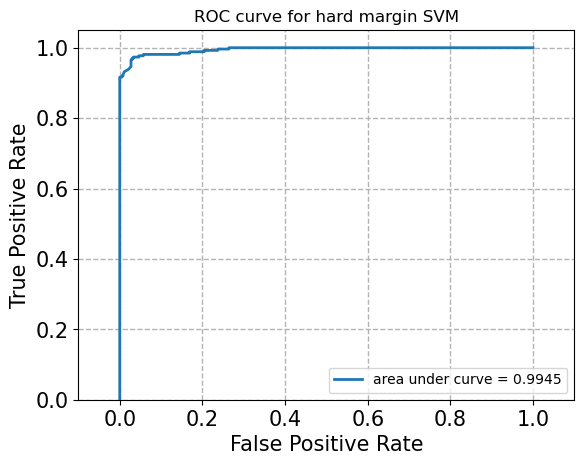

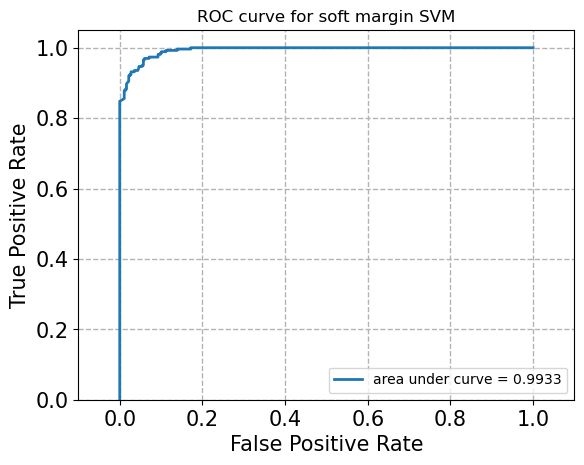

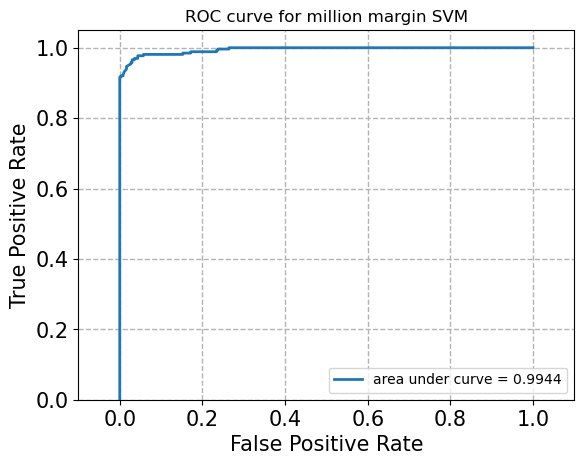

In [192]:
# define plot drawing
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=2,label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
# prepare plot for svm_hard
score_hard = clf_hard.decision_function(X_test_LSI)
#print(len(score_hard))
fpr_hard, tpr_hard, _ = metrics.roc_curve(y_test, score_hard)

# prepare plot for svm_soft
score_soft = clf_soft.decision_function(X_test_LSI)
#print(len(score_hard))
fpr_soft, tpr_soft, _ = metrics.roc_curve(y_test, score_soft)

score_million = clf_million.decision_function(X_test_LSI)
#print(len(score_hard))
fpr_million, tpr_million, _ = metrics.roc_curve(y_test, score_million)

plot_roc(fpr_hard, tpr_hard)
plt.title("ROC curve for hard margin SVM")
plot_roc(fpr_soft, tpr_soft)
plt.title("ROC curve for soft margin SVM")
plot_roc(fpr_million, tpr_million)
plt.title("ROC curve for million margin SVM")

In [193]:
# Confusion Matrix & other metrics
def evaluate(classifier, clf_name, testSet, label, average=''):
    y_pred = classifier.predict(testSet)
    CM = metrics.confusion_matrix(label, y_pred)
    
    print('-'*20, 'Confusion Matrix of', clf_name, '-'*20)
    print(CM)
    
    accuracy = metrics.accuracy_score(label, y_pred)
    if average == '':
        recall = metrics.recall_score(label, y_pred)
        precision = metrics.precision_score(label, y_pred)
        Fscore = metrics.f1_score(label, y_pred)
    else:
        recall = metrics.recall_score(label,y_pred,average=average)
        precision = metrics.precision_score(label, y_pred,average=average)
        Fscore = metrics.f1_score(label, y_pred,average=average)
    
    print('-'*20, 'Other Evaluation of', clf_name, '-'*20)
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F-1 Score:', Fscore)

evaluate(clf_hard, 'hard SVM(C=1000)', X_test_LSI, y_test)
print()
evaluate(clf_soft, 'soft SVM(C=0.0001)', X_test_LSI, y_test)
print()
evaluate(clf_million, 'million SVM(C=100000)', X_test_LSI, y_test)
print()

print('-'*20,'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->','sports')
print('Value of 1 ->','climate')

-------------------- Confusion Matrix of hard SVM(C=1000) --------------------
[[348  19]
 [  6 257]]
-------------------- Other Evaluation of hard SVM(C=1000) --------------------
Accuracy: 0.9603174603174603
Recall: 0.9771863117870723
Precision: 0.9311594202898551
F-1 Score: 0.953617810760668

-------------------- Confusion Matrix of soft SVM(C=0.0001) --------------------
[[367   0]
 [263   0]]
-------------------- Other Evaluation of soft SVM(C=0.0001) --------------------
Accuracy: 0.5825396825396826
Recall: 0.0
Precision: 0.0
F-1 Score: 0.0

-------------------- Confusion Matrix of million SVM(C=100000) --------------------
[[348  19]
 [  6 257]]
-------------------- Other Evaluation of million SVM(C=100000) --------------------
Accuracy: 0.9603174603174603
Recall: 0.9771863117870723
Precision: 0.9311594202898551
F-1 Score: 0.953617810760668

-------------------- Notes of Index --------------------
labels are:
Value of 0 -> sports
Value of 1 -> climate


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
# hard performs better than soft and the performance might not change much after some point

In [195]:
# False positive and true positive are 0
# https://stats.stackexchange.com/questions/569062/why-i-am-getting-tp-and-fp-in-confusion-matrix-is-0-how-to-get-it-right

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def cross_validate(classifier, train, label, k_l, k_r):
    avg_score = []

    for k in range(k_l, k_r):
        classifier.set_params(C=10**k).fit(train, label)
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
        scores = cross_val_score(classifier, train, label, cv=cv, scoring='accuracy')
    
        print('-'*20,'C =',10**k,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(k_l,k_r)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =', 10**c_idx)
    print('Average Accuracy is:', max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)

svm_best = cross_validate(svm.SVC(kernel='linear'), X_train_LSI, y_train, -3, 6)

-------------------- C = 0.001 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.01 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.1 --------------------
[0.93915344 0.94708995 0.92724868 0.92857143 0.92195767]
0.9328042328042327
-------------------- C = 1 --------------------
[0.94179894 0.95502646 0.93650794 0.94179894 0.91798942]
0.9386243386243386
-------------------- C = 10 --------------------
[0.9484127  0.9537037  0.94179894 0.9510582  0.92724868]
0.9444444444444443
-------------------- C = 100 --------------------
[0.95502646 0.94973545 0.94708995 0.95502646 0.93121693]
0.9476190476190475
-------------------- C = 1000 --------------------
[0.95502646 0.9457672  0.9484127  0.95634921 0.92989418]
0.947089947089947
-------------------- C = 10000 --------------------
[0.95767196 0.9457672  0.94708995 0.9510582  0.92857143]
0.9460317

SVC(C=100, kernel='linear')


Text(0.5, 1.0, 'ROC Curve of the best SVM')

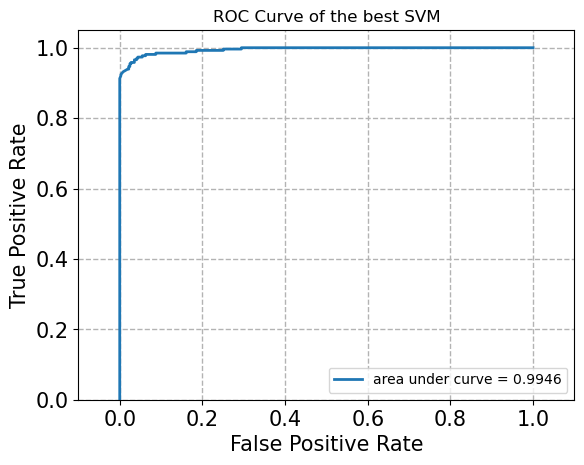

In [197]:
print(svm_best)

score = svm_best.decision_function(X_test_LSI)
fpr, tpr, _ = metrics.roc_curve(y_test, score)

plot_roc(fpr, tpr)
plt.title('ROC Curve of the best SVM')

In [198]:
evaluate(svm_best, 'best SVM(C=100)', X_test_LSI, y_test)

-------------------- Confusion Matrix of best SVM(C=100) --------------------
[[347  20]
 [  7 256]]
-------------------- Other Evaluation of best SVM(C=100) --------------------
Accuracy: 0.9571428571428572
Recall: 0.973384030418251
Precision: 0.927536231884058
F-1 Score: 0.9499072356215214


### Question 6

In [224]:
from sklearn.linear_model import LogisticRegression
lr_nonReg = LogisticRegression(penalty='none', solver='saga', random_state=42).fit(X_train_LSI, y_train)

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve of Logistic Regression without Regularization')

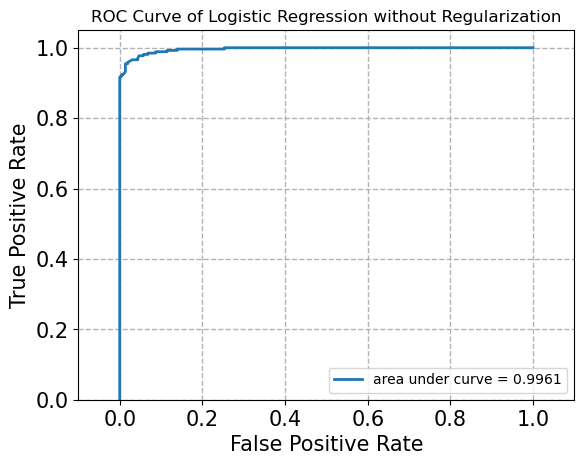

In [225]:
# plot ROC curve
score_nonReg = lr_nonReg.decision_function(X_test_LSI)
fpr_nonReg, tpr_nonReg, _ = metrics.roc_curve(y_test, score_nonReg)

plot_roc(fpr_nonReg, tpr_nonReg)
plt.title('ROC Curve of Logistic Regression without Regularization')

In [226]:
# Confusion Matrix and other metrics of Logistic Regression without regularization 
evaluate(lr_nonReg, 'Logistic Regression without Regularization', X_test_LSI, y_test)

print()
print('-'*20,'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->','sports')
print('Value of 1 ->','climate')

-------------------- Confusion Matrix of Logistic Regression without Regularization --------------------
[[349  18]
 [  6 257]]
-------------------- Other Evaluation of Logistic Regression without Regularization --------------------
Accuracy: 0.9619047619047619
Recall: 0.9771863117870723
Precision: 0.9345454545454546
F-1 Score: 0.9553903345724907

-------------------- Notes of Index --------------------
labels are:
Value of 0 -> sports
Value of 1 -> climate


In [227]:
# Logistic Regression with Regularization
# Using 5-fold cross-validation to optimize the regularization strength

In [231]:
# L1 regularization
lr_L1 = cross_validate(LogisticRegression(penalty='l1', solver='saga', random_state=42),
                        X_train_LSI, y_train, -5, 5)

-------------------- C = 1e-05 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.0001 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.001 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.01 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.1 --------------------
[0.91798942 0.92460317 0.91534392 0.91402116 0.91534392]
0.9174603174603174
-------------------- C = 1 --------------------
[0.94708995 0.94179894 0.93915344 0.93650794 0.92460317]
0.9378306878306878


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/p

-------------------- C = 10 --------------------
[0.9537037  0.95502646 0.9510582  0.94973545 0.92989418]
0.9478835978835978


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/p

-------------------- C = 100 --------------------
[0.95899471 0.9537037  0.95238095 0.95634921 0.93386243]
0.9510582010582009


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/p

-------------------- C = 1000 --------------------
[0.96031746 0.95238095 0.95238095 0.95634921 0.93386243]
0.9510582010582009


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/p

-------------------- C = 10000 --------------------
[0.96031746 0.95238095 0.95238095 0.95634921 0.93386243]
0.9510582010582009
-------------------- Result --------------------
The best classifier is when C = 100
Average Accuracy is: 0.9510582010582009


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [232]:
# L2 regularization
lr_L2 = cross_validate(LogisticRegression(penalty='l2', solver='saga', random_state=42),
                        X_train_LSI, y_train, -5, 5)

-------------------- C = 1e-05 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.0001 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.001 --------------------
[0.5542328  0.56481481 0.52116402 0.53703704 0.5489418 ]
0.5452380952380953
-------------------- C = 0.01 --------------------
[0.65079365 0.68518519 0.5542328  0.58597884 0.62962963]
0.6211640211640213
-------------------- C = 0.1 --------------------
[0.92063492 0.93650794 0.91137566 0.90608466 0.91269841]
0.9174603174603175
-------------------- C = 1 --------------------
[0.94708995 0.9510582  0.93650794 0.94179894 0.92460317]
0.9402116402116402
-------------------- C = 10 --------------------
[0.9537037  0.9537037  0.94708995 0.9484127  0.92989418]
0.9465608465608465


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/p

-------------------- C = 100 --------------------
[0.95238095 0.95238095 0.9484127  0.95238095 0.93253968]
0.9476190476190476


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/p

-------------------- C = 1000 --------------------
[0.96031746 0.9537037  0.95238095 0.95634921 0.93386243]
0.9513227513227512


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


-------------------- C = 10000 --------------------
[0.96031746 0.95238095 0.95238095 0.95634921 0.93386243]
0.9510582010582009
-------------------- Result --------------------
The best classifier is when C = 1000
Average Accuracy is: 0.9513227513227512


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The best inverse of regularization strength for L2 is 1000

Compare 3 classifiers

In [233]:
# For test data, compare their performance

y_pred_nonReg = lr_nonReg.predict(X_test_LSI)
y_pred_L1 = lr_L1.predict(X_test_LSI)
y_pred_L2 = lr_L2.predict(X_test_LSI)

accuracy_nonReg = metrics.accuracy_score(y_test, y_pred_nonReg)
accuracy_L1 = metrics.accuracy_score(y_test, y_pred_L1)
accuracy_L2 = metrics.accuracy_score(y_test, y_pred_L2)

recall_nonReg = metrics.recall_score(y_test, y_pred_nonReg)
recall_L1 = metrics.recall_score(y_test, y_pred_L1)
recall_L2 = metrics.recall_score(y_test, y_pred_L2)

precision_nonReg = metrics.precision_score(y_test, y_pred_nonReg)
precision_L1 = metrics.precision_score(y_test, y_pred_L1)
precision_L2 = metrics.precision_score(y_test, y_pred_L2)

Fscore_nonReg = metrics.f1_score(y_test, y_pred_nonReg)
Fscore_L1 = metrics.f1_score(y_test, y_pred_L1)
Fscore_L2 = metrics.f1_score(y_test, y_pred_L2)

# show time

print('-'*20, 'Logistic Regression with w/o regularization','-'*20)
print('Accuracy:',accuracy_nonReg)
print('Recall:',recall_nonReg)
print('Precision:',precision_nonReg)
print('F-1 Score:',Fscore_nonReg)

print('-'*20, 'Logistic Regression with w/L1 regularization','-'*20)
print('Accuracy:',accuracy_L1)
print('Recall:',recall_L1)
print('Precision:',precision_L1)
print('F-1 Score:',Fscore_L1)

print('-'*20, 'Logistic Regression with w/L2 regularization','-'*20)
print('Accuracy:',accuracy_L2)
print('Recall:',recall_L2)
print('Precision:',precision_L2)
print('F-1 Score:',Fscore_L2)

-------------------- Logistic Regression with w/o regularization --------------------
Accuracy: 0.9619047619047619
Recall: 0.9771863117870723
Precision: 0.9345454545454546
F-1 Score: 0.9553903345724907
-------------------- Logistic Regression with w/L1 regularization --------------------
Accuracy: 0.9619047619047619
Recall: 0.9771863117870723
Precision: 0.9345454545454546
F-1 Score: 0.9553903345724907
-------------------- Logistic Regression with w/L2 regularization --------------------
Accuracy: 0.9619047619047619
Recall: 0.9771863117870723
Precision: 0.9345454545454546
F-1 Score: 0.9553903345724907


In [206]:
# Confusion Matrix 

CM_nonReg = metrics.confusion_matrix(y_test, y_pred_nonReg)
CM_L1 = metrics.confusion_matrix(y_test, y_pred_L1)
CM_L2 = metrics.confusion_matrix(y_test, y_pred_L2)

# show time
print('-'*20, 'Confusion Matrix of w/o regularization','-'*20)
print(CM_nonReg)
print('-'*20, 'Confusion Matrix of w/L1 regularization','-'*20)
print(CM_L1)
print('-'*20, 'Confusion Matrix of w/L2 regularization','-'*20)
print(CM_L2)
print('-'*20, 'Notes of Index','-'*20)
print('labels are:')
# print('Value of 0 ->',new_name[0])
# print('Value of 1 ->',new_name[1])

-------------------- Confusion Matrix of w/o regularization --------------------
[[349  18]
 [  6 257]]
-------------------- Confusion Matrix of w/L1 regularization --------------------
[[349  18]
 [  6 257]]
-------------------- Confusion Matrix of w/L2 regularization --------------------
[[349  18]
 [  6 257]]
-------------------- Notes of Index --------------------
labels are:


In [207]:
# Learnt coefficients
print('-'*20, 'Coefficients of w/o regularization','-'*20)
print(lr_nonReg.coef_)
print('-'*20, 'Coefficients of w/L1 regularization','-'*20)
print(lr_L1.coef_)
print('-'*20, 'Coefficients of w/L2 regularization','-'*20)
print(lr_L2.coef_)

-------------------- Coefficients of w/o regularization --------------------
[[-4.62033826e+00 -1.35051048e+01 -5.92626950e+01 -3.93718122e+01
  -1.32290560e+01  1.89139086e+01  3.17222381e+00 -2.69815745e+00
   3.64277404e+01  5.81886081e+00  6.02578120e+00 -2.91030642e+01
  -2.37075595e+01  2.23562072e+01  2.85949031e+01 -2.38375336e+01
   2.34308772e+01  1.89610076e+01  1.55243661e+01  2.49297934e+01
  -2.18321567e+00  2.21445923e+00 -1.19367293e+01 -9.67717390e+00
   8.77621112e+00 -1.27448516e+01  4.24263268e+00 -2.26126100e-02
  -1.67912530e+01  1.60459778e+01  1.06978829e-01  6.61343551e+00
   2.46087534e+00  1.00226758e+01 -2.48974977e+00  1.17628643e+00
  -4.42970161e+00 -2.88664137e+00 -2.47180580e+00 -6.92013150e+00
  -7.13577183e+00  1.99405438e+00  9.83357082e-01 -1.58060851e+01
  -1.01170581e+01 -5.06157387e+00 -5.61189969e+00  1.50963119e+01
   6.46692741e+00 -1.34246924e+01]]
-------------------- Coefficients of w/L1 regularization --------------------
[[ -3.94766647 -1

### Question 7

In [235]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train_LSI, y_train)

Text(0.5, 1.0, 'ROC Curve of GaussianNB')

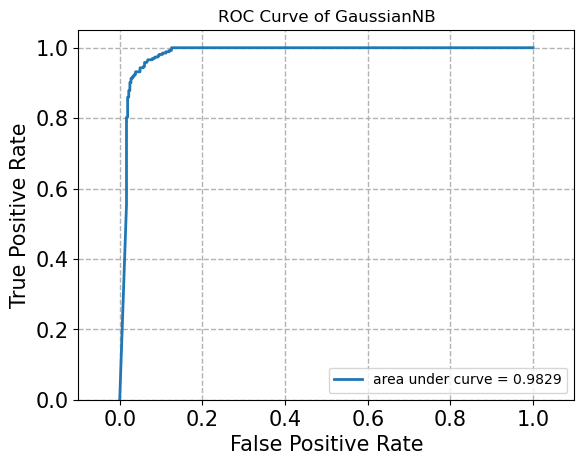

In [237]:
# ROC curve for GaussianNB
score_bayes = bayes.predict_proba(X_test_LSI)[:,1]
fpr_bayes, tpr_bayes, _ = metrics.roc_curve(y_test, score_bayes)

plot_roc(fpr_bayes, tpr_bayes)
plt.title('ROC Curve of GaussianNB')

In [238]:
# Evaluation
evaluate(bayes, 'GaussianNB', X_test_LSI, y_test)

-------------------- Confusion Matrix of GaussianNB --------------------
[[333  34]
 [  6 257]]
-------------------- Other Evaluation of GaussianNB --------------------
Accuracy: 0.9365079365079365
Recall: 0.9771863117870723
Precision: 0.8831615120274914
F-1 Score: 0.927797833935018


In [246]:
# prepare for pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=stem_rmv_nums)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', svm.SVC(kernel='linear', C=100, random_state=42))
])

pipeline.fit(train.full_text, y_train)
predict = pipeline.predict(test.full_text)
print("accuracy:{}".format(metrics.accuracy_score(y_test, predict)))

accuracy:0.9571428571428572


In [293]:
# Do not remove headers and footers

from sklearn.model_selection import GridSearchCV

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
import joblib
from joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
memory=memory
)

param_grid = [
    {
        'vect': [
            CountVectorizer(min_df=3, analyzer=stem_rmv_nums),
            CountVectorizer(min_df=5, analyzer=stem_rmv_nums),
            CountVectorizer(min_df=3, analyzer=stemming),
            CountVectorizer(min_df=5, analyzer=stemming)
        ],
        'reduce_dim': [TruncatedSVD(n_components=5, random_state=42),
                       TruncatedSVD(n_components=30, random_state=42),
                       TruncatedSVD(n_components=80, random_state=42),
                       NMF(n_components=5, init='random', random_state=42),
                       NMF(n_components=30, init='random', random_state=42),
                       NMF(n_components=80, init='random', random_state=42)
        ],
        'clf': [svm.SVC(kernel='linear', C=100, random_state=42),
                LogisticRegression(penalty='l1', C=100, random_state=42),
                LogisticRegression(penalty='l2', C=1000, random_state=42),
                GaussianNB()
        ],
    }
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train.full_text, y_train)
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_nums at 0x7fb2d2495c10>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0

_______________________________________________fit_transform_one - 37.0s, 0.6min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(), <2016x11850 sparse matrix of type '<class 'numpy.int64'>'
	with 309594 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130    0
1294    0
860     0
Name: root_label, Length: 2016, dtype: int64, 
None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=5, random_state=42), <2016x11850 sparse matrix of type '<class 'numpy.float64'>'
	with 309594 stored elements in Compressed Sparse Row format>, 
2310    

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_nums at 0x7fb2d2495c10>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x12099 sparse matrix of type '<class 'numpy.float64'>'
	with 312585 stored elements in Compressed Sparse Row format>, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130    0
1294    0
860     0
Name: root_label, Length: 2016, dtype: int64, 
None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loa

________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d53f38d52f7901770f1a16bb5ec2872b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/509a5e92866f6336ccd2f23d43f45c14
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=30, random_state=42), <2016x8366 sparse matrix of type '<class 'numpy.float64'>'
	with 297769 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
2988    1


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

________________________________________________fit_transform_one - 0.4s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/5f6e27f6b8497503f3940f527227e091
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/97db9cbf3d441fe85ac7a21398dccb19
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(n_components=80, random_state=42), <2016x11955 sparse matrix of type '<class 'numpy.float64'>'
	with 308110 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
2988    1

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x12099 sparse matrix of type '<class 'numpy.float64'>'
	with 312585 stored elements in Compressed Sparse Row format>, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130    0
1294    0
860     0
Name: root_label, Length: 2016, dtype: int64, 
None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.3s, 0.0min
[Memory]0.0s, 0.0min    

________________________________________________fit_transform_one - 0.2s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d53f38d52f7901770f1a16bb5ec2872b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/509a5e92866f6336ccd2f23d43f45c14
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=5, random_state=42), <2016x8366 sparse matrix of type '<class 'numpy.float64'>'
	with 297769 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
2988 

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

________________________________________________fit_transform_one - 2.6s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/5f6e27f6b8497503f3940f527227e091
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/97db9cbf3d441fe85ac7a21398dccb19
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x11955 sparse matrix of type '<class 'numpy.float64'>'
	with 308110 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
298

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 3.4s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd49ccb3e3e7b43bb9cb83f3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/48f6b3ba8dec0f4685b052ee90b83fae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=30, random_state=42), <2016x8029 sparse matrix of type '<class 'numpy.float64'>'
	with 294640 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
2988

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


________________________________________________fit_transform_one - 3.2s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/09f7af7cc7c22388b4399e2b3554c057
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x12099 sparse matrix of type '<class 'numpy.float64'>'
	with 312585 stored elements in Compressed Sparse Row format>, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130    0
1294    0
860     0
Name

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 25.3s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693704d49accc4840f3e1a437
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/84161535a11160803df71d4b0a1fabdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x12035 sparse matrix of type '<class 'numpy.float64'>'
	with 310479 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
298

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 25.0s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/e09442228e4e4b4e3e391f7778cb2146
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1be23c85393d80bc227264660a57173a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x12084 sparse matrix of type '<class 'numpy.float64'>'
	with 316023 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
298

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 24.3s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/700d5efe5fa13421b48fbc9d50786ffa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80ec1d9f90b1ac17dbfbc67bd2ff7346
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x11850 sparse matrix of type '<class 'numpy.float64'>'
	with 309594 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
298

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 22.8s, 0.4min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1363e5daf7798ca1a3a5657fe82fdbf2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d194720849d35930ef922a686f656ac2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x8449 sparse matrix of type '<class 'numpy.float64'>'
	with 300214 stored elements in Compressed Sparse Row format>, 
406     0
1518    0
1268    0
497 

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 16.0s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/63ce6f26593e481b2ffec31c61494c6a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d797b151e1a6ab0f341c9c5bfbf7a5c7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x8464 sparse matrix of type '<class 'numpy.float64'>'
	with 303845 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
2988

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 18.8s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd49ccb3e3e7b43bb9cb83f3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/48f6b3ba8dec0f4685b052ee90b83fae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(init='random', n_components=80, random_state=42), <2016x8029 sparse matrix of type '<class 'numpy.float64'>'
	with 294640 stored elements in Compressed Sparse Row format>, 
2310    1
2189    1
2304    1
2988

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


_______________________________________________fit_transform_one - 16.8s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d53f38d52f7901770f1a16bb5ec2872b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/509a5e92866f6336ccd2f23d43f45c14
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/9f6c2d4e1ac99294765956d4e7128373
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/bcacdba43644d38306e75cc6cde1b372
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/7fba72069be1a6973dd8b75bece1655b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/63ce6f26593e481b2ffec31c61494c6a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxht

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/bcacdba43644d38306e75cc6cde1b372
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/ebe8577169b753aaa6f8cbdc5caa3731
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/63ce6f26593e481b2ffec31c61494c6a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxht

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/bcacdba43644d38306e75cc6cde1b372
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/3b316c312c6528fa6276d82e7a307729
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/63ce6f26593e481b2ffec31c61494c6a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxht

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/bcacdba43644d38306e75cc6cde1b372
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/de7cae25c6e72121b94c5592d0b1b232
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/63ce6f26593e481b2ffec31c61494c6a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxht

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80ec1d9f90b1ac17dbfbc67bd2ff7346
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/50df5b9ea489179a9ddf83282dbdad49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/5f6e27f6b8497503f3940f527227e091
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxht

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693704d49accc4840f3e1a437
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/84161535a11160803df71d4b0a1fabdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/6097cc69583f9dd965c39164a6b478a2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/e09442228e

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/09f7af7cc7c22388b4399e2b3554c057
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/5b51f2664571a2e36050686a2945b057
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d53f38d52f7901770f1a16bb5ec2872b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/509a5e92866f6336ccd2f23d43f45c14
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c691fd215114793ac9e371d9cee13b38
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1363e5daf7798ca1a3a5657fe82fdbf2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d194720849d35930ef922a686f656ac2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/51b9cae60752bd823eedae4794e17b71
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1dfab0287a

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693704d49accc4840f3e1a437
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/84161535a11160803df71d4b0a1fabdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/fd8c3caad77d8147118cbd68d0c669b9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/e09442228e4e4b4e3e391f7778cb2146
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1be23c85393d80bc227264660a57173a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/ebbfe3afb296987fd0206e6cdeb34b78
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/700d5efe5fa13421b48fbc9d50786ffa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80ec1d9f90b1ac17dbfbc67bd2ff7346
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/40cd9c69345b9d251c524fa8d1aa02a2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/5f6e27f6b8497503f3940f527227e091
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/97db9cbf3d441fe85ac7a21398dccb19
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/82bb25ad229c9a20878aa8688fee30bd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1363e5daf7798ca1a3a5657fe82fdbf2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d194720849d35930ef922a686f656ac2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/3800704eff14663f2f96616de0beeff3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1dfab0287ae47eefd05a6046ba9c8eba
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/bcacdba43644d38306e75cc6cde1b372
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/de7cae25c6e72121b94c5592d0b1b232
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/63ce6f2659

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd49ccb3e3e7b43bb9cb83f3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/48f6b3ba8dec0f4685b052ee90b83fae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/45b25a8b332808fc825c472bc10fb123
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
1005    'Ryan Rosenblatt Former Soccer Contributor\n\n...
386     'India's Kuldeep Yadav plays during the first ...
3136    'Pius Kamau, M.D., a retired general surgeon, ...
2132    'A memorial service was held in honor of a 28-...
501     'SYLHET, Bangladesh (AP) — Opener Smriti Mandh...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
753     0
1630    0
11  

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693704d49accc4840f3e1a437
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/84161535a11160803df71d4b0a1fabdd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/e8e7f23c421fbdea79cfa301424f25ea
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/e09442228e4e4b4e3e391f7778cb2146
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1be23c85393d80bc227264660a57173a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c27a3fcc9c064b128334715caf706a8f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/700d5efe5fa13421b48fbc9d50786ffa
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80ec1d9f90b1ac17dbfbc67bd2ff7346
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/50df5b9ea489179a9ddf83282dbdad49
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/5f6e27f6b8497503f3940f527227e091
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/97db9cbf3d441fe85ac7a21398dccb19
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/00ed3e26db2d99911dbe182bd139986e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1363e5daf7798ca1a3a5657fe82fdbf2
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d194720849d35930ef922a686f656ac2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/73d4784a499541adc5b5dcaffe009c9c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1dfab0287ae47eefd05a6046ba9c8eba
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/bcacdba43644d38306e75cc6cde1b372
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/981f39d7443f00677d6a0cf92778ccee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/63ce6f26593e481b2ffec31c61494c6a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d797b151e1a6ab0f341c9c5bfbf7a5c7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/1ab223775000ff6e74512f8867c38c3a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/d53f38d52f7901770f1a16bb5ec2872b
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/509a5e92866f6336ccd2f23d43f45c14
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/e010f0e1311c5ce2b2b3f2d893f1d65d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd49ccb3e3e7b43bb9cb83f3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/48f6b3ba8dec0f4685b052ee90b83fae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/0b4a58ccf830a62a83b3d44826bc8f58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/09f7af7cc7c22388b4399e2b3554c057
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/35e57d7612a1c58e0edcdbe6c5e3d00c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/09f7af7cc7c22388b4399e2b3554c057
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/5b51f2664571a2e36050686a2945b057
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/09f7af7cc7c22388b4399e2b3554c057
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c5eb19f47da0ac8a45012b940483aa03
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/09f7af7cc7c22388b4399e2b3554c057
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/80c27d72f90b78d1d01acac2251e7ee9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c99e023693e0d40e7e6815e9abf475ba
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/44f85a8693

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=3), 167     'The New “LA Kings Ice at Mammoth Lakes” Will ...
3112    'Future Market Insights Global and Consulting ...
3116    'Country\n\nUnited States of America US Virgin...
801     'The Arizona State Sun Devils faced the Colora...
90      'Congratulations to Kirsten Johnson of Smyrna ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
406     0
1518    0
1268    0
497     0
342     0
       ..
3092    1
1095    0
1130

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
1005    'Ryan Rosenblatt Former Soccer Contributor\n\n...
386     'India's Kuldeep Yadav plays during the first ...
3136    'Pius Kamau, M.D., a retired general surgeon, ...
2132    'A memorial service was held in honor of a 28-...
501     'SYLHET, Bangladesh (AP) — Opener Smriti Mandh...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
753     0
1630    0
11  

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd49ccb3e3e7b43bb9cb83f3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/48f6b3ba8dec0f4685b052ee90b83fae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/45b25a8b332808fc825c472bc10fb123
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
1005    'Ryan Rosenblatt Former Soccer Contributor\n\n...
386     'India's Kuldeep Yadav plays during the first ...
3136    'Pius Kamau, M.D., a retired general surgeon, ...
2132    'A memorial service was held in honor of a 28-...
501     'SYLHET, Bangladesh (AP) — Opener Smriti Mandh...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
753     0
1630    0
11  

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/c26cedddfd49ccb3e3e7b43bb9cb83f3
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/48f6b3ba8dec0f4685b052ee90b83fae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/tmpk1a3u5eo/joblib/sklearn/pipeline/_fit_transform_one/0b4a58ccf830a62a83b3d44826bc8f58
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stemming at 0x7fb2d2495820>, min_df=5), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2016, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0
1130

/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/sijieliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transfo

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_nums at 0x7fb2d2495c10>, min_df=3), 2941    'Most of California’s urban water agencies bel...
2799    'Country\n\nUnited States of America US Virgin...
88      'Labatt Blue Celebrates Partnership Extension ...
510     'Trent Boult has been left out of New Zealand'...
2643    'The four-day event retained its title of the ...
                              ...                        
471     'The West Indies have had little success in th...
897     'Kevin Langley/Icon Sportswire via Getty Image...
2262    'Hide Transcript Show Transcript\n\n, COMMUNIT...
2246    'Agency: " Federal Emergency Management Agency...
835     'Jackson State coach Deion Sanders says histor...
Name: full_text, Length: 2520, dtype: object, 
2310    1
2189    1
2304    1
2988    1
221     0
       ..
3092    1
1095    0

In [294]:
result_rm = pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.666874,2.847467,9.310356,1.107430,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.547619,0.547619,0.549603,0.549603,0.549603,0.548810,0.000972,1
1,40.860882,1.320041,10.189593,0.741392,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.547619,0.547619,0.549603,0.549603,0.549603,0.548810,0.000972,1
2,0.109890,0.007611,0.000000,0.000000,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stemming at...,"{'clf': SVC(C=100, kernel='linear', random_sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
3,0.108235,0.011016,0.000000,0.000000,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stemming at...,"{'clf': SVC(C=100, kernel='linear', random_sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
4,0.767715,0.179701,10.183519,0.788326,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=30, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.533730,0.541667,0.545635,0.539683,0.541667,0.540476,0.003888,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.100024,0.006125,0.000000,0.000000,GaussianNB(),"NMF(init='random', n_components=30, random_sta...",CountVectorizer(analyzer=<function stemming at...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
92,0.120425,0.003797,9.676454,0.484585,GaussianNB(),"NMF(init='random', n_components=80, random_sta...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.507937,0.464286,0.496032,0.501984,0.513889,0.496825,0.017325,26
93,0.111075,0.000863,9.747499,0.453217,GaussianNB(),"NMF(init='random', n_components=80, random_sta...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",0.509921,0.468254,0.507937,0.521825,0.535714,0.508730,0.022539,25
94,0.100141,0.004755,0.000000,0.000000,GaussianNB(),"NMF(init='random', n_components=80, random_sta...",CountVectorizer(analyzer=<function stemming at...,"{'clf': GaussianNB(), 'reduce_dim': NMF(init='...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79


In [295]:
# some_value = max(result_rm.mean_test_score)
# result_rm.loc[result_rm['mean_test_score'] == some_value]
# print(result['params'][19])
result_rm.sort_values(by=['mean_test_score'], ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.666874,2.847467,9.310356,1.107430,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.547619,0.547619,0.549603,0.549603,0.549603,0.54881,0.000972,1
13,0.448515,0.077395,10.712622,0.622343,"SVC(C=100, kernel='linear', random_state=42)","NMF(init='random', n_components=5, random_stat...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.547619,0.547619,0.549603,0.549603,0.549603,0.54881,0.000972,1
1,40.860882,1.320041,10.189593,0.741392,"SVC(C=100, kernel='linear', random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=100, kernel='linear', random_sta...",0.547619,0.547619,0.549603,0.549603,0.549603,0.54881,0.000972,1
49,0.148253,0.049926,10.810470,0.414814,"LogisticRegression(C=1000, random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': LogisticRegression(C=1000, random_stat...",0.547619,0.549603,0.549603,0.547619,0.549603,0.54881,0.000972,1
48,0.123102,0.004109,10.649456,0.358525,"LogisticRegression(C=1000, random_state=42)","TruncatedSVD(n_components=5, random_state=42)",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': LogisticRegression(C=1000, random_stat...",0.547619,0.547619,0.549603,0.549603,0.549603,0.54881,0.000972,1


In [ ]:
# ['chess', 'cricket', 'hockey', 'soccer', 'football', '%22forest%20fire%22', 'flood', 'earthquake', 'drought']

### Question9

In [321]:
# prepare data
# from sklearn.datasets import fetch_20newsgroups
# categories8 = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
# 'misc.forsale', 'soc.religion.christian']

# train_ds = fetch_20newsgroups(subset = 'train', 
#                                       categories = categories8, 
#                                       shuffle = True, 
#                                       random_state = None)
# test_ds = fetch_20newsgroups(subset = 'test', 
#                                       categories = categories8, 
#                                       shuffle = True, 
#                                       random_state = None)

# preprocess data

# vect
vec8 = CountVectorizer(min_df=3, analyzer=stem_rmv_nums)
train_vect = vec8.fit_transform(train1.full_text)
test_vect = vec8.transform(test1.full_text)

# tfidf
tfidf8 = TfidfTransformer()
train_tfidf = tfidf8.fit_transform(train_vect)
test_tfidf = tfidf8.transform(test_vect)

# lsi
from sklearn.decomposition import TruncatedSVD
svd8 = TruncatedSVD(n_components = 50, random_state = 42)
X_train9 = svd8.fit_transform(train_tfidf)
X_test9 = svd8.transform(test_tfidf)

# check
# print(len(train_ds.data))
# print(len(test_ds.data))
print('-'*20,'After preprocess','-'*20)
print(X_train9.shape)
print(X_test9.shape)

-------------------- After preprocess --------------------
(2520, 50)
(630, 50)


In [322]:
# train

In [323]:
print(np.unique(train1.leaf_label))

['%22forest%20fire%22' 'chess' 'cricket' 'drought' 'earthquake' 'flood'
 'football' 'hockey' 'soccer']


In [324]:
# map_row_to_class = {0:"chess", 1:"cricket", 2:"hockey", 3:"soccer",
# 4:"football", 5:"%22forest%20fire%22", 6:"flood", 7:"earthquake",
# 8:"drought"}
label_to_num = {"chess": 0, "cricket": 1, "hockey": 2, "soccer":3,
                "football":4, "%22forest%20fire%22":5, "flood":6, "earthquake": 7, "drought":8}
new_labels_train = []
new_labels_test = []
def map_row_to_class(datasets, new_labels):
    for i in datasets:
        new_labels.append(label_to_num[i])
map_row_to_class(train1.leaf_label.values, new_labels_train)
map_row_to_class(test1.leaf_label.values, new_labels_test)

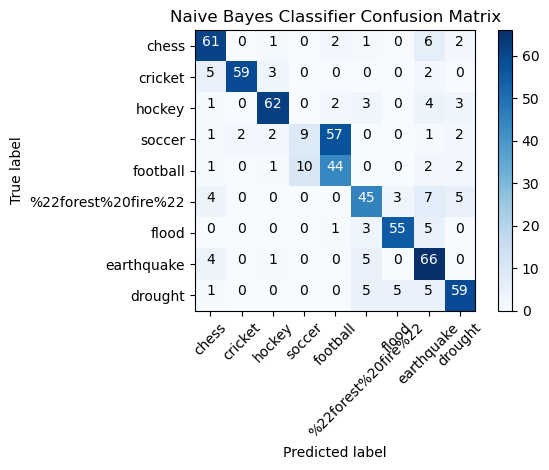

In [329]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
Mclass_names = ["chess", "cricket", 'hockey', "soccer", "football", "%22forest%20fire%22", "flood", "earthquake", "drought"]
GNB_pred_Y = GaussianNB().fit(X_train9, train1.leaf_label).predict(X_test9)
predicted_labels = []
map_row_to_class(GNB_pred_Y, predicted_labels)
GNB_pred_Y_cm = metrics.confusion_matrix(new_labels_test,predicted_labels)
plt.figure() 
plot_confusion_matrix(GNB_pred_Y_cm, classes=Mclass_names, title='Naive Bayes Classifier Confusion Matrix') 

In [326]:
bayes8 = GaussianNB().fit(X_train9, train1.leaf_label)

# evaluate
evaluate(bayes8, 'GaussianNB', X_test9, test1.leaf_label, 'macro')

-------------------- Confusion Matrix of GaussianNB --------------------
[[45  4  0  5  7  3  0  0  0]
 [ 1 61  0  2  6  0  2  1  0]
 [ 0  5 59  0  2  0  0  3  0]
 [ 5  1  0 59  5  5  0  0  0]
 [ 5  4  0  0 66  0  0  1  0]
 [ 3  0  0  0  5 55  1  0  0]
 [ 0  1  0  2  2  0 44  1 10]
 [ 3  1  0  3  4  0  2 62  0]
 [ 0  1  2  2  1  0 57  2  9]]
-------------------- Other Evaluation of GaussianNB --------------------
Accuracy: 0.7301587301587301
Recall: 0.7322109158937943
Precision: 0.7338075692371882
F-1 Score: 0.7145362270998993


In [292]:
svm_ovr = svm.SVC(kernel='linear', C=100).fit(X_train9, train1.leaf_label)

# evaluate
evaluate(svm_ovr, 'SVC (ovr)', X_test9, test1.leaf_label, 'macro')


-------------------- Confusion Matrix of SVC (ovr) --------------------
[[60  2  0  6  1  0  0  0  0]
 [ 5 67  2  1  0  0  0  0  0]
 [ 1  0 57  0  1  0  0  0  0]
 [ 2  0  1 51  0  2  0  0  0]
 [ 5  2  0  0 72  1  0  0  0]
 [ 5  0  0  1  0 64  0  0  0]
 [ 0  0  0  0  0  0 35  1 23]
 [ 6  1  1  2  0  0  0 67  3]
 [ 0  0  1  0  0  0 59  0 22]]
-------------------- Other Evaluation of SVC (ovr) --------------------
Accuracy: 0.7857142857142857
Recall: 0.7947792519499748
Precision: 0.7938251569337482
F-1 Score: 0.7867307524011347


In [291]:
svm_ovo = svm.SVC(kernel='linear', C=100, decision_function_shape = 'ovo').fit(X_train9, train1.leaf_label)

# evaluate
evaluate(svm_ovo, 'SVC (ovo)', X_test9, test1.leaf_label, 'macro')

-------------------- Confusion Matrix of SVC (ovo) --------------------
[[60  2  0  6  1  0  0  0  0]
 [ 5 67  2  1  0  0  0  0  0]
 [ 1  0 57  0  1  0  0  0  0]
 [ 2  0  1 51  0  2  0  0  0]
 [ 5  2  0  0 72  1  0  0  0]
 [ 5  0  0  1  0 64  0  0  0]
 [ 0  0  0  0  0  0 35  1 23]
 [ 6  1  1  2  0  0  0 67  3]
 [ 0  0  1  0  0  0 59  0 22]]
-------------------- Other Evaluation of SVC (ovo) --------------------
Accuracy: 0.7857142857142857
Recall: 0.7947792519499748
Precision: 0.7938251569337482
F-1 Score: 0.7867307524011347


##### Merge soccer and football because FP= 57.

In [331]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
multiclass_svm_OvO = OneVsOneClassifier(svm.SVC(random_state=42))
multiclass_svm_OvR = OneVsRestClassifier(svm.SVC(random_state=42))


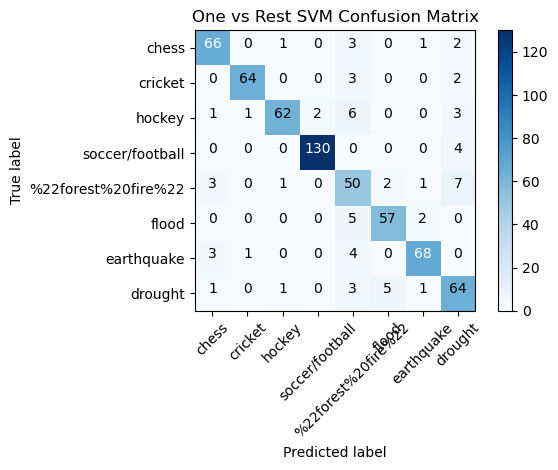

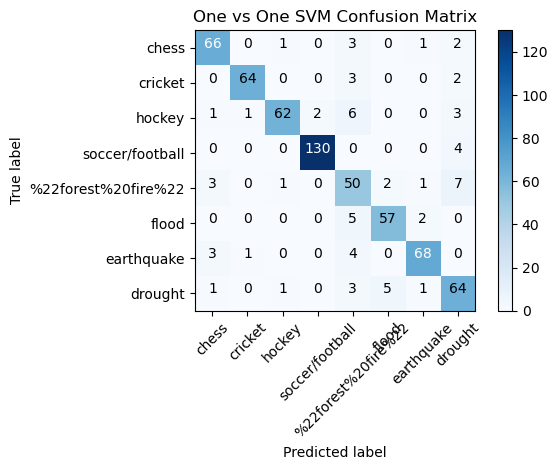

In [337]:
new_label_to_num = {"chess": 0, "cricket": 1, "hockey": 2, "soccer":3,
                "football":3, "%22forest%20fire%22":4, "flood":5, "earthquake": 6, "drought":7}

def new_map(dataset, label):
    for i in dataset:
        label.append(new_label_to_num[i])
        
merged_label_train = []
merged_label_test = []
new_map(train1.leaf_label.values, merged_label_train)
new_map(test1.leaf_label.values, merged_label_test)


Mclass_names = ["chess", "cricket", 'hockey', "soccer/football", "%22forest%20fire%22", "flood", "earthquake", "drought"]

svm_ovr = svm.SVC(kernel='linear', C=100).fit(X_train9, merged_label_train).predict(X_test9)
pred_svm_mc_cm = metrics.confusion_matrix(merged_label_test,svm_ovr)
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs Rest SVM Confusion Matrix') 

#Introduce Subsampling in Pipeline
# pipe = Pipeline([('sampl', SMOTEENN(sampling_strategy='all', random_state=42)), 
#                  ('clf', SVC(kernel = 'linear', random_state=42, C=100))])

svm_ovo = svm.SVC(kernel='linear', C=100, decision_function_shape = 'ovo').fit(X_train9, merged_label_train).predict(X_test9)
pred_svm_mc_cm = metrics.confusion_matrix(merged_label_test,svm_ovo)
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs One SVM Confusion Matrix') 

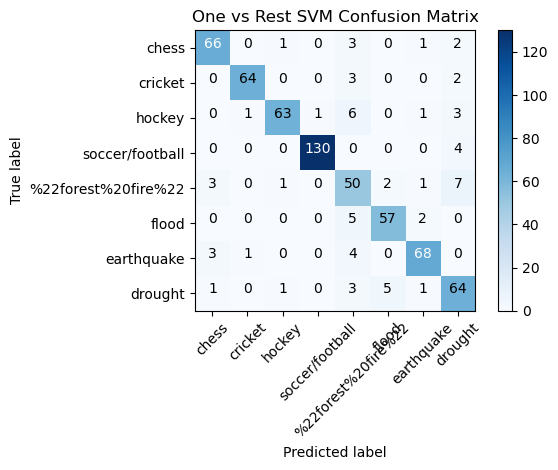

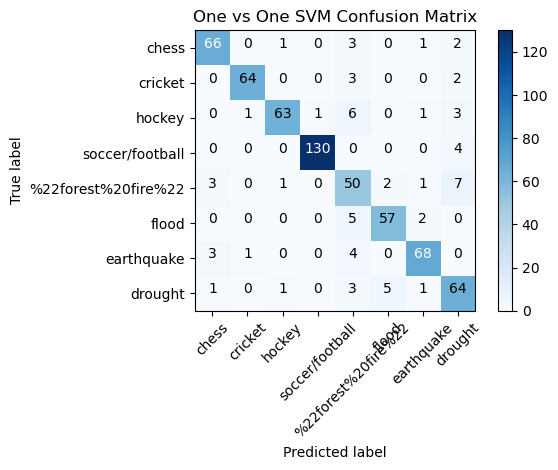

In [338]:
# balance

svm_ovr_balanced = svm.SVC(kernel='linear', C=100, class_weight = "balanced").fit(X_train9, merged_label_train).predict(X_test9)
pred_svm_mc_cm = metrics.confusion_matrix(merged_label_test,svm_ovr_balanced)
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs Rest SVM Confusion Matrix') 

#Introduce Subsampling in Pipeline
# pipe = Pipeline([('sampl', SMOTEENN(sampling_strategy='all', random_state=42)), 
#                  ('clf', SVC(kernel = 'linear', random_state=42, C=100))])

svm_ovo_balanced = svm.SVC(kernel='linear', C=100, decision_function_shape = 'ovo', class_weight = "balanced").fit(X_train9, merged_label_train).predict(X_test9)
pred_svm_mc_cm = metrics.confusion_matrix(merged_label_test, svm_ovo_balanced)
plt.figure() 
plot_confusion_matrix(pred_svm_mc_cm, classes=Mclass_names, title='One vs One SVM Confusion Matrix') 

### Question 10

### Question 11

In [342]:
embeddings_dict = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [351]:
train11, test11 = train_test_split(df[["full_text","root_label", "keywords", "summary"]], test_size=0.2)
train11

,full_text,root_label,keywords,summary
2678,'SACRAMENTO — Sunday was a busy day for Countr...,climate,"['season', 'festivals', 'sacramento', 'bring',...",'SACRAMENTO — Sunday was a busy day for Countr...
550,"'AP\n\nOAKLAND, Calif. (AP) — Longtime executi...",sports,"['stays', 'game', 'billy', 'advisory', 'david'...","'APOAKLAND, Calif. (AP) — Longtime executive B..."
398,'LONDON (AP) — England’s rearranged tour of Ba...,sports,"['odi', 'chattogram', 'series', 'played', 'eng...",'LONDON (AP) — England’s rearranged tour of Ba...
1961,'Researchers at Colorado State University hope...,climate,"['damage', 'videos', '9news', 'work', 'model',...",'Researchers at Colorado State University hope...
2105,'The hiring of Mark Hara is the beginning of F...,climate,"['parametric', 'insurer', 'hara', 'breaks', 'w...","'After an extensive search, Hara joins to lead..."
...,...,...,...,...
3010,'You have permission to edit this article.\n\n...,climate,"['close', 'lazy', 'permission', 'edit', 'lette...",'You have permission to edit this article.'
170,'Boston College travels west to Arizona and cl...,sports,"['state', 'second', 'dec', 'series', 'east', '...",'Boston College travels west to Arizona and cl...
1086,'About Photo #4851693: Gerard Pique retired fr...,sports,"['soccer', 'gerard', 'pique', 'game', 'retired...",'About Photo #4851693: Gerard Pique retired fr...
2274,'Credit: Environmental Science & Technology (2...,climate,"['blue', 'production', 'virtual', 'chains', 'd...",'Water is heavily needed throughout the entire...


In [353]:
df

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label,full_text_num
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports,2162
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports,4898
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports,4066
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports,6561
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports,145
...,...,...,...,...,...,...,...,...,...
3145,'By Rachel Premack of FreightWaves\n\nYou prob...,'Right now the barge industry — and all of us ...,"['coal', 'traffic', 'right', 'mississippi', 's...",NaN,['Tyler Durden'],https://www.zerohedge.com/markets/latest-suppl...,drought,climate,5750
3146,'Manufacturing had a big summer. The CHIPS and...,'To address these issues and drive the transit...,"['manufacturing', 'system', 'future', 'technol...",NaN,['Mary Beth Gallagher'],https://news.mit.edu/2022/manufacturing-cleane...,drought,climate,13419
3147,"'A golf cart on a path at Verrado, an 8,800-ac...",'Water flow has dropped precipitously in the C...,"['developers', 'live', 'state', 'development',...",NaN,['Keith Schneider'],https://news.yahoo.com/thousands-live-one-day-...,drought,climate,6936
3148,"'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","'Jakarta, Dec 25 (EFE).- Dozens of Rohingya re...","['rohingyas', 'told', 'indonesia', 'refugees',...",NaN,['Online News Editor'],https://www.laprensalatina.com/dozens-of-rohin...,drought,climate,1517


In [360]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

def transform_glove(data, model):

    dim = len(model.get_vector("king"))

    X = np.zeros((len(data), dim))
    n = 0
    for sentence in X_train9:
        tokens = sentence.split()
        vecs = []
        for word in tokens:
            try:
                vec = model.get_vector(word)
                vecs.append(vec)
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            X[n] = vecs.mean(axis=0)
        n += 1
    
    Y = np.zeros((len(data), dim))
    n = 0
    for sentence in data['keywords']:
        tokens = sentence.split()
        vecs = []
        for word in tokens:
            try:
                vec = model.get_vector(word)
                vecs.append(vec)
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            Y[n] = vecs.mean(axis=0)
        n += 1
        
    Z = np.zeros((len(data), dim))
    n = 0
    for sentence in data['summary']:
        tokens = sentence.split()
        vecs = []
        for word in tokens:
            try:
                vec = model.get_vector(word)
                vecs.append(vec)
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            Z[n] = vecs.mean(axis=0)
        n += 1
    
    for i in range(0, len(data)):
        for j in range(0, dim):
            X[i][j] = (X[i][j] + Y[i][j] + Z[i][j]) / 3
    
    return X

embeddings_dict = {}
dimension_of_glove = 300
with open("glove.6B.300d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

glove_name = 'glove.6B.300d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)        

train_glove = train11[['full_text', 'keywords', 'summary']]
train_glove_transformed = transform_glove(train_glove, model) 

test_glove = test11[['full_text', 'keywords', 'summary']]
test_glove_transformed = transform_glove(test_glove, model)

class_names=["Sports","Climate"]

gamma=[0.001]

best_gamma = 0.001
best_accuracy = 0

# Cross validation/scoring should happen on the training data
# for g in gamma:
#     Glove_SVM = SVC(kernel='linear',C=g, random_state=42)  
#     scores = cross_val_score(Glove_SVM, train_glove_transformed, X_True_Train, cv=5)
#     print("%0.3f: %0.9f accuracy with a standard deviation of %0.2f" % (g, scores.mean(), scores.std()))
#     if scores.mean() > best_accuracy:
#         best_accuracy = scores.mean()
#         best_gamma = g

print('Best Gamma: ', best_gamma)

Glove_SVM = svm.SVC(kernel='linear',C=best_gamma, random_state=42)   
X_Glove_SVM_pred = Glove_SVM.fit(train_glove_transformed, y_train).predict(test_glove_transformed)
# Classifier_Metrics(y_test, X_Glove_SVM_pred, name="SVM")
Best_SVM_cm = metrics.confusion_matrix(y_test, X_Glove_SVM_pred) 
plt.figure()
plot_confusion_matrix(Best_SVM_cm, classes = class_names, title='GloVe SVM Confusion Matrix') 
# ROC_curve(y_test, Glove_SVM.decision_function(test_glove_transformed), name="GloVe SVM")

/var/folders/nj/3nflqwjj7j184fxhtqzwq7dw0000gn/T/ipykernel_1840/2424132838.py:74: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_name, word2vec_output_file)


AttributeError: 'numpy.ndarray' object has no attribute 'split'

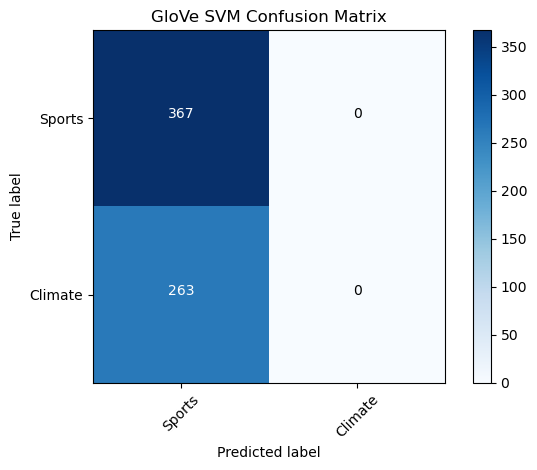

In [358]:
Glove_SVM = svm.SVC(kernel='linear',C=best_gamma, random_state=42)   
X_Glove_SVM_pred = Glove_SVM.fit(train_glove_transformed, y_train).predict(test_glove_transformed)
# Classifier_Metrics(y_test, X_Glove_SVM_pred, name="SVM")
Best_SVM_cm = metrics.confusion_matrix(y_test, X_Glove_SVM_pred) 
plt.figure()
plot_confusion_matrix(Best_SVM_cm, classes = class_names, title='GloVe SVM Confusion Matrix') 
# ROC_curve(y_test, Glove_SVM.decision_function(test_glove_transformed), name="GloVe SVM")